# Play MNIST with PCA(code)

The MNISTdatabase is an image dataset of handwritten digits (0~9). Each image in MNIST is represented by a pixel matrix of 28*28, totally 784 elements. Since the images in MNIST are in gray scale, the value of each pixel ranges from 0 to 255, representing different gray degrees.

For this assignment, we have a ".csv" file,  the file represents  image samples. The first column indicates the handwritten digit of the image (label). Each of the rest columns denotes the value of each pixel axis (from 1 to 28 for both x-axis and y-axis) in an image. For example, the column "1x28" denotes the pixel value at x=1 (the first row) and y=28 (the 28th column). Now we want you to apply PCA to MNIST for data analytics.


## 0. Import

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from pylab import *
###from sklearn.decomposition import PCA

## 1. Load "mnist.csv" with pandas

In [2]:
df = pd.read_csv("../input/mnist-pca/mnist.csv")
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Print the shape of the data

In [3]:
print("The shape of mnist.csv is:", "\n", df.shape)

The shape of mnist.csv is: 
 (60000, 785)


In [4]:
data = df.drop(["label"],axis = 1)
print("The shape of data is:", "\n", data.shape)

The shape of data is: 
 (60000, 784)


## 3. Take the pixel values of the first sample and reshape it to (28, 28)

The function "change_to_pil_matrix" will also be used in final step.

In [5]:
def change_to_pil_matrix (dataframe,i):  #aim to take the (i+1)th sample
    #select a sample
    x = dataframe[i:i+1]
    #converts the df of the sample to a 1-dimensional array format
    sample = np.array(x)
    #turn a 1-dimensional array into a 2-dimensional PIL_matrix (28*28)
    PIL_matrix = sample.reshape((28,28))
    
    return PIL_matrix

In [6]:
first_sample = change_to_pil_matrix (data,0)
print("The shape of first_sample is:", "\n", first_sample.shape)
print("The first_sample is:", "\n",first_sample)

The shape of first_sample is: 
 (28, 28)
The first_sample is: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]


## 4. Plot the first sample with plt.imshow()

(<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x7ff041ba8ad0>)

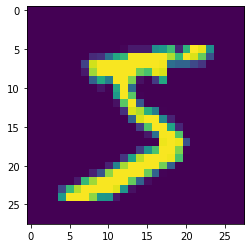

In [7]:
plt,imshow(first_sample)

## 5. Split the data into X (the pixel values) and y (the digit label)

In [8]:
X = np.array(data)

print("The shape of X is:", "\n", X.shape)
print("X is:", "\n", X)

The shape of X is: 
 (60000, 784)
X is: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
#Y is he digit label
Y = df["label"]

print("The shape of Y is:", "\n", Y.shape)
print("Y is:", "\n", Y)

The shape of Y is: 
 (60000,)
Y is: 
 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64


## 6. Standardize X by dividing 255.0

In [10]:
def normalization (data):
    nol_data = data/255
    
    return nol_data

nol_X = normalization (X)

#check
print("Check before normalization:")
print(X.min(), "-", X.max())
print("Check after min-max normalization:")
print(nol_X.min(), "-", nol_X.max())

Check before normalization:
0 - 255
Check after min-max normalization:
0.0 - 1.0


## 7. Apply PCA to X and obtain the eigenvalues as well as the eigenvectors (please implement it with numpy instead of other advanced libraries)

In [11]:
#get covariance matrix 
covX = np.cov(nol_X.T)

#get eigenvalues, eigenvectors, which arranged from largest to smallest
eigenvalues, eigenvectors = np.linalg.eig(covX)
print("Eigenvalues as well as eigenvectors are:","\n",eigenvectors)

Eigenvalues as well as eigenvectors are: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## 8. You may notice that the results contain the complex numbers of which the imaginary part is zero. Please remove the imaginary part with np.real()

In [12]:
remove_i_eigenvectors = np.real(eigenvectors)
print("Eigenvectors after remove the imaginary part are:","\n",remove_i_eigenvectors)

Eigenvectors after remove the imaginary part are: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## 9. Use the top-30 eigenvectors (with the largest thirty eigenvalues) to transform the training data to Z.

In [13]:
#select the largest k feature vectors, k=30 here
selectVec = remove_i_eigenvectors[:, :30]
Z = np.dot(nol_X, selectVec)

print("The shape of Z is:", "\n", Z.shape)
print("Z is:", "\n",Z)

The shape of Z is: 
 (60000, 30)
Z is: 
 [[-3.45384876 -1.29392457  0.77492676 ... -0.6360691  -0.51386024
   0.5206804 ]
 [-6.93536165 -1.22405311  3.20964681 ... -0.16166522 -1.43901047
   0.3729488 ]
 [-2.76450681  1.47018294  0.13180638 ... -0.52084165  0.02981159
   1.12786725]
 ...
 [-2.26958978  0.5600067  -0.13918709 ...  0.64755595 -0.71228873
   1.51175629]
 [-3.48001928 -0.08968016  2.88619235 ...  1.11891731 -0.48737813
  -0.14931916]
 [-2.28769762 -0.16468747  3.05152655 ...  0.7286741  -0.21899266
  -0.11495676]]


## 10. Reconstruct the training data from Z to X~, then multiply it by 255.0

In [14]:
X_reconstruct = np.dot(Z, selectVec.T) * 255

print("The shape of X~ is:", "\n", X_reconstruct.shape)
print("X~ is:", "\n",X_reconstruct)

The shape of X~ is: 
 (60000, 784)
X~ is: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 11. Plot the sample of the reconstructed data X~. Compare it with the original one. 

Compare like the first sample.

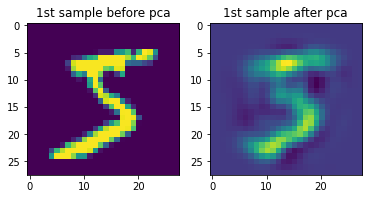

In [15]:
fig = plt.figure()
 
ax = fig.add_subplot(121)
plt.title("1st sample before pca")
ax.imshow(first_sample)

pca_first_sample = change_to_pil_matrix (X_reconstruct,0)
ax = fig.add_subplot(122)
plt.title("1st sample after pca")
ax.imshow(pca_first_sample)

#print(first_sample.shape, pca_first_sample.shape)

Conclusion: The image sharpness is reduced after PCA.

# * Simplify steps and function packaging

## ** Simplify step 3-5

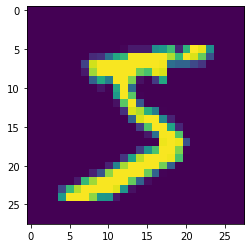

The label of 1 th sample is 5


In [16]:
three_d_X = np.reshape(X,(60000, 28, 28))


def show_PIL_image_and_Label (x,y,i):  #aim to take the (i+1)th sample
    plt.imshow(x[i])
    plt.show()
    label = y[i]
    print("The label of", i+1, "th sample is", label)
    return label

first_sample_label = show_PIL_image_and_Label(three_d_X,Y,0)

## ** Function packaging step 6-10

Parameters:
- X: raw data matrix
- k: indicates the number of principal components
The return value:
- Z: The returned low-dimensional matrix
- X_reconstruct: The matrix after reconstruct the training data

In [17]:
def pca(X, k):
    m, n = np.shape(X)                                # Returns the dimension of X is m*n
    nol_X = X/255                                     # step6: Standardize X by dividing 255.0(min-max)
    covX = np.cov(nol_X.T)                            # step7: Get the covariance matrix
    eigenValue, eigenVec = np.linalg.eig(covX)        # step7: Get eigenvalues that from the largest to the smallest
    remove_i_eigenvectors = np.real(eigenVec)         # step8: remove i part
                                                   
    if k > n:
        print('k must be lower than feature number') 
        return
    else:
        selectVec = remove_i_eigenvectors[:, :k]      # Select the largest k feature vectors
        Z = np.dot(nol_X, selectVec)                  # step9
        X_reconstruct = np.dot(Z, selectVec.T)*255    # step10
    return X_reconstruct

#when k = 30
X_reconstruct_after_pca = pca(X,30)
X_reconstruct_after_pca                               # same to X_reconstruct in step10

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## ** Result in step 11

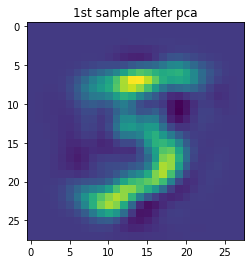

In [18]:
pca_first_sample = change_to_pil_matrix (X_reconstruct_after_pca,0)
plt.title("1st sample after pca")
plt.imshow(pca_first_sample)